In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/My Drive/NNFL/data3.xlsx'
data = pd.read_excel(path, header = None)

In [ ]:
data = np.array(data)
np.random.shuffle(data)

In [ ]:
n, m = data.shape
x = data[:, :m-1]
y = data[:, m-1]
x = np.array(x)
y = np.array(y)

In [ ]:
for i in range(len(y)):
  if y[i] == 1:
    y[i] = 0
  else:
    y[i] = 1

In [ ]:
def normalize(x):
  n = x.shape[0]
  mean = np.mean(x, axis=0, keepdims=True)
  std = np.std(x, axis=0, keepdims=True)

  ret = (x-mean)/std
  return ret

In [ ]:
X = normalize(x)
Y = y

In [ ]:
n, m = data.shape
training_ratio = 0.6
train_size = int(training_ratio * n)
test_size = int((1 - training_ratio) * n)

ones = np.ones((n, 1))
X = np.concatenate([ones, X], axis=1)

In [ ]:
x_train = X[:train_size].reshape(m, train_size)
x_test = X[train_size:].reshape(m, test_size)
y_train = Y[:train_size].reshape(1, train_size)
y_test = Y[train_size:].reshape(1, test_size)

In [ ]:
x_train.shape, y_train.shape

((5, 60), (1, 60))

In [ ]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [ ]:
def model(w, x, y, iterations, alpha):
  delta = 0.0
  costs = []
  grads = []

  for iter in range(iterations):
    
    pred = np.dot(w, x)
    pred = sigmoid(pred)

    dp = x_train.shape[0]

    costval = (-1.0 / dp) * (np.sum(np.multiply(y, np.log(pred)) + np.multiply(1.0-y, np.log(1.0 - pred)), axis=1))
    costs.append(costval)

    gradval = np.dot((pred - y), x.T)
    grads.append(gradval)

    w = w - alpha*gradval
    
  return costs, grads, w

In [ ]:
w = np.random.randn(1, m)
alpha = 0.07
iterations = 500
costs = []
grads = []

In [ ]:
costs, grads, w = model(w, x_train, y_train, iterations, alpha)

In [ ]:
costs[-1]

array([7.80007143])

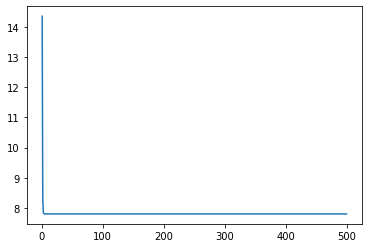

In [ ]:
plt.plot([i for i in range(1, iterations+1)], costs)

In [ ]:
y_pred = sigmoid(np.dot(w, x_test))

In [ ]:
n = y_pred[0].shape[0]

pred = []
act = []

for i in range(n):
  if (y_test[0][i] >= 0.5):
    act.append(1)
  else:
    act.append(0)

for i in range(n):
  if (y_pred[0][i] >= 0.5):
    pred.append(1)
  else:
    pred.append(0)

pred = np.array(pred)
act = np.array(act)

In [ ]:
truepos = 0
trueneg = 0
falsepos = 0
falseneg = 0

for i in range(n):
  if (act[i] == 0):
    if (pred[i] == 0):
      trueneg += 1
    else:
      falsepos += 1
  else:
    if (pred[i] == 1):
      truepos += 1
    else:
      falseneg += 1

In [ ]:
# accuracy
acc = (truepos + trueneg) / (truepos + trueneg + falsepos + falseneg)

# sensitivity
sen = truepos / (truepos + falseneg)

# specificity
spec = trueneg / (trueneg + falsepos)

In [ ]:
print("Accuracy = " + str(acc))
print("Sensitivity = " + str(sen))
print("Specificity = " + str(spec))

Accuracy = 0.6
Sensitivity = 0.6190476190476191
Specificity = 0.5789473684210527
